In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

In [ ]:
import nltk
from nltk import tokenize
from nltk import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [3]:
from convokit import Corpus, download
corpus = Corpus(filename=download("diplomacy-corpus"))

Dataset already exists at C:\Users\margutie\.convokit\downloads\diplomacy-corpus


In [4]:
corpus.print_summary_stats()

Number of Speakers: 83
Number of Utterances: 17289
Number of Conversations: 246


In [5]:
# Obtener información sobre las conversaciones en el corpus
conversaciones = corpus.conversations
for conversation_id, conversation_info in conversaciones.items():
    print(f"Conversación ID: {conversation_id}")
    print(f"Información: {conversation_info.to_dict()}")
    print("-----")


Conversación ID: Game1-italy-germany
Información: {'id': 'Game1-italy-germany', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-austria-italy
Información: {'id': 'Game1-austria-italy', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-italy-russia
Información: {'id': 'Game1-italy-russia', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-england-italy
Información: {'id': 'Game1-england-italy', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-turkey-italy
Información: {'id': 'Game1-turkey-italy', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-italy-france
Información: {'id': 'Game1-italy-france', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-austria-germany
Información: {'id': 'Game1-austria-germany', 'vectors': [], 'meta': {'acl2020_fold': 'Train'}}
-----
Conversación ID: Game1-germany-russia
Información:

In [6]:
# Obtener información sobre las conversaciones en el corpus
conversaciones = corpus.conversations
for conversation_id, conversation_info in conversaciones.items():
    print(f"Conversación ID: {conversation_id}")
    
    # Obtener mensajes en la conversación

    for mensaje_info in conversation_info.iter_utterances():
        mensaje_id = mensaje_info.id
        texto = mensaje_info.text
        speaker_intention = mensaje_info.meta['speaker_intention']
        receiver_perception = mensaje_info.meta['receiver_perception']
        
        print(f"Mensaje ID: {mensaje_id}")
        print(f"Texto: {texto}")
        print(f"Intención del hablante: {speaker_intention}")
        print(f"Percepción del receptor: {receiver_perception}")
        print("-----")
        
        es_verdad = speaker_intention == "Truth" and receiver_perception == "Truth"
        es_mentira = speaker_intention == "Lie" and receiver_perception == "Lie"
        print(f"Es verdad: {es_verdad}")
        print(f"Es mentira: {es_mentira}")
        print("-----")

        

Conversación ID: Game1-italy-germany
Mensaje ID: Game1-italy-germany-0
Texto: Germany!

Just the person I want to speak with. I have a somewhat crazy idea that I’ve always wanted to try with I/G, but I’ve never actually convinced the other guy to try it. And, what’s worse, it might make you suspicious of me. 

So...do I suggest it?

I’m thinking that this is a low stakes game, not a tournament or anything, and an interesting and unusual move set might make it more fun? That’s my hope anyway.

What is your appetite like for unusual and crazy?
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-italy-germany-1
Texto: You've whet my appetite, Italy. What's the suggestion?
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-italy-germany-2
Texto: 👍
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: Fals

I'm assuming standard Galicia bounce right now. happy to discuss other options.
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-austria-russia-2
Texto: Yeah, I was figuring standard Galicia bounce too. Keeps both of us honest.
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-austria-russia-3
Texto: So, here's my pitch: I have been on both sides of the deal when Austria, Italy, and Russia decide that everything would be simpler if there wasn't a Turkey. Every time, things have indeed been simpler for A/I/R. So, whaddya think? Wanna simplify our game?
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-austria-russia-4
Texto: I literally just told Italy to go after Turkey first. 😀
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es 

Percepción del receptor: None
-----
Es verdad: False
Es mentira: False
-----
Mensaje ID: Game1-england-france-123
Texto: Nice, that went well
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-england-france-124
Texto: Sorry for the late notice. Just a heads up that I plan to build a fleet in Brest but will park it in the MAO as a deterrent to Italy
Intención del hablante: Truth
Percepción del receptor: Lie
-----
Es verdad: False
Es mentira: False
-----
Mensaje ID: Game1-england-france-125
Texto: Can you explain why you didn’t build it in Mar?
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game1-england-france-126
Texto: Yeah, sure. I couldn't build it in Marseilles because there would be very little I could tell Italy to persuade him that I wasn't planning to attack him with that build, even though that isn't my intention.
Intención del habl

Mensaje ID: Game2-austria-italy-203
Texto: But I ain’t lol
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game2-austria-italy-204
Texto: You can, but honestly preserve your social capital.  It's your call.  I don't think I've lied yet and I don't think I will this game.  Save your lie for the two center stab, not the build position
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game2-austria-italy-205
Texto: I mean I’m telling turkey that
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game2-austria-italy-206
Texto: Not everyone
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: False
-----
Mensaje ID: Game2-austria-italy-207
Texto: Kk
Intención del hablante: Truth
Percepción del receptor: Truth
-----
Es verdad: True
Es mentira: Fa

Es verdad: False
Es mentira: False
-----
Mensaje ID: Game2-germany-russia-42
Texto: Can you still support me into Norway from SKA?
Intención del hablante: Truth
Percepción del receptor: None
-----
Es verdad: False
Es mentira: False
-----
Mensaje ID: Game2-germany-russia-43
Texto: Negotiations with england are stalled.
Intención del hablante: Truth
Percepción del receptor: None
-----
Es verdad: False
Es mentira: False
-----
Mensaje ID: Game2-germany-russia-44
Texto: Hey - are you online?
Intención del hablante: Truth
Percepción del receptor: None
-----
Es verdad: False
Es mentira: False
-----
Mensaje ID: Game2-germany-russia-45
Texto: Am now. Had to retreat from Sweden.
Intención del hablante: Truth
Percepción del receptor: None
-----
Es verdad: False
Es mentira: False
-----
Mensaje ID: Game2-germany-russia-46
Texto: Yeah man tough break
Intención del hablante: Truth
Percepción del receptor: None
-----
Es verdad: False
Es mentira: False
-----
Conversación ID: Game2-england-germany
Mensa

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Por comodidad, creamos un dataframe ya que es más familiar hacia trabajos que he realizado

In [7]:
# Listas para almacenar los datos
conversacion_ids = []
mensaje_ids = []
textos = []
speaker_intentions = []
receiver_perceptions = []

# Obtener información sobre las conversaciones en el corpus
conversaciones = corpus.conversations
for conversation_id, conversation_info in conversaciones.items():
    for mensaje_info in conversation_info.iter_utterances():
        # Recopilar datos
        conversacion_ids.append(conversation_id)
        mensaje_ids.append(mensaje_info.id)
        textos.append(mensaje_info.text)
        speaker_intentions.append(mensaje_info.meta['speaker_intention'])
        receiver_perceptions.append(mensaje_info.meta['receiver_perception'])

# Crear DataFrame
data = {
    'conversacion_id': conversacion_ids,
    'mensaje_id': mensaje_ids,
    'texto': textos,
    'speaker_intention': speaker_intentions,
    'receiver_perception': receiver_perceptions
}

df = pd.DataFrame(data)

In [ ]:
df

# Analisis descriptivo de las variables

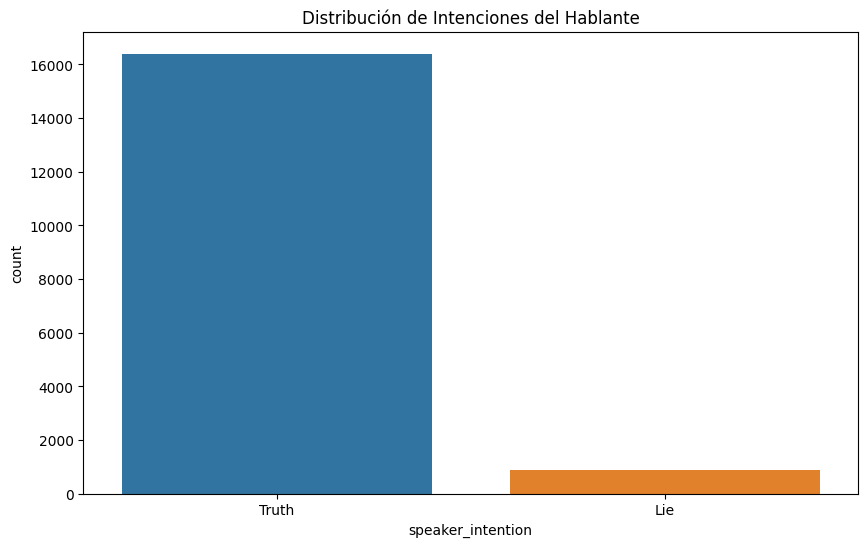

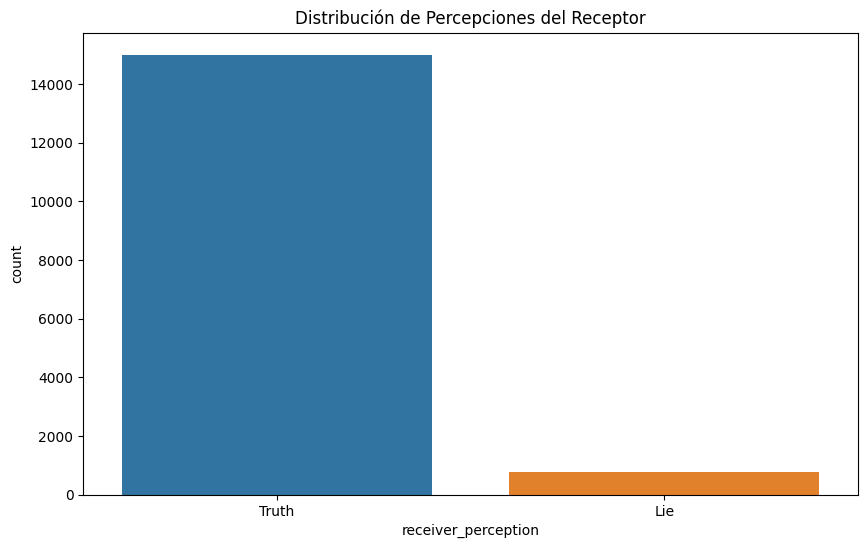

In [8]:
# Crear un countplot para la intención del hablante
plt.figure(figsize=(10, 6))
sns.countplot(x='speaker_intention', data=df)
plt.title('Distribución de Intenciones del Hablante')
plt.show()

# Crear un countplot para la percepción del receptor
plt.figure(figsize=(10, 6))
sns.countplot(x='receiver_perception', data=df)
plt.title('Distribución de Percepciones del Receptor')
plt.show()


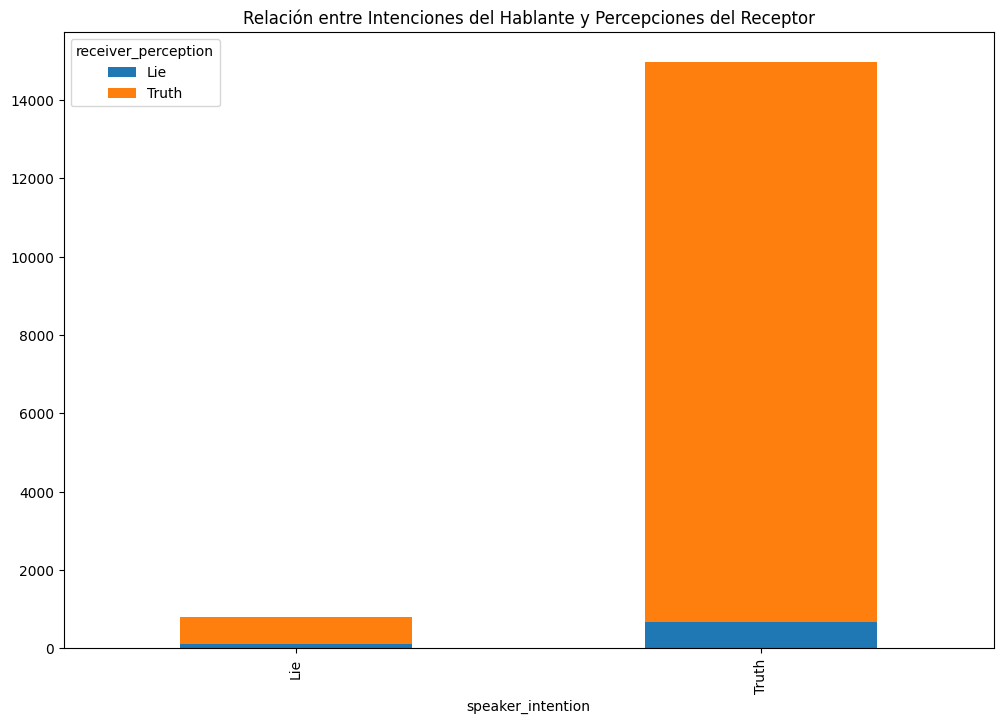

In [9]:
# Crear un gráfico de barras apiladas para la relación entre intenciones del hablante y percepciones del receptor
df_relacion = df.groupby(['speaker_intention', 'receiver_perception']).size().unstack()
df_relacion.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relación entre Intenciones del Hablante y Percepciones del Receptor')
plt.show()

In [10]:
# df descriptivo
df.describe()

,conversacion_id,mensaje_id,texto,speaker_intention,receiver_perception
count,17289,17289,17289,17289,15783
unique,246,17289,16792,2,2
top,Game1-england-germany,Game1-italy-germany-0,Yes,Truth,Truth
freq,675,1,20,16402,15005


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['longitud_mensaje'], bins=30, kde=True)
plt.title('Distribución de Longitud de Mensajes')
plt.show()

KeyError: 'longitud_mensaje'

<Figure size 1000x600 with 0 Axes>

# **Limpieza de texto**

In [ ]:
def clean_text(text):
    tokens = word_tokenize(text)
    # convertir a minúsculas
    tokens = [w.lower() for w in tokens]
    # prepare a regex para el filtrado de caracteres
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # eliminar la puntuación de cada palabra
    stripped = [re_punc.sub('', w) for w in tokens]
    # eliminar los tokens restantes que no estén en orden alfabético
    words = [word for word in stripped if word.isalpha()]
    # filtrar las stopswords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    lemmatizer = WordNetLemmatizer()
    words_lem = [lemmatizer.lemmatize(x) for x in words]
    text_lem = ' '.join(words_lem)
    return text_lem

In [ ]:
# Aplicar la función de limpieza de texto completa a la columna "texto"
df['texto_limpio'] = df['texto'].apply(clean_text)
df

Aquí tenemos ya el df procesado

In [13]:
df=pd.read_csv('Diplomacy.csv')
df

,Unnamed: 0,conversacion_id,mensaje_id,texto,speaker_intention,receiver_perception,texto_limpio
0,0,Game1-italy-germany,Game1-italy-germany-0,Germany!\n\nJust the person I want to speak wi...,Truth,Truth,germany person want speak somewhat crazy idea ...
1,1,Game1-italy-germany,Game1-italy-germany-1,"You've whet my appetite, Italy. What's the sug...",Truth,Truth,whet appetite italy suggestion
2,2,Game1-italy-germany,Game1-italy-germany-2,👍,Truth,Truth,NaN
3,3,Game1-italy-germany,Game1-italy-germany-3,It seems like there are a lot of ways that cou...,Truth,Truth,seems like lot way could go wrong nt see franc...
4,4,Game1-italy-germany,Game1-italy-germany-4,"Yeah, I can’t say I’ve tried it and it works, ...",Truth,NaN,yeah say tried work cause never tried seen thi...
...,...,...,...,...,...,...,...
17284,17284,Game9-turkey-france,Game9-turkey-france-29,Mm I see,Truth,Truth,mm see
17285,17285,Game9-turkey-france,Game9-turkey-france-30,"Well, just putting the option out there I guess",Truth,Truth,well putting option guess
17286,17286,Game9-turkey-france,Game9-turkey-france-31,you have anything else in mind?,Truth,Truth,anything else mind
17287,17287,Game9-turkey-france,Game9-turkey-france-32,I guess I'd also be happy to support you into ...,Truth,Truth,guess also happy support getting tun ion inter...


In [14]:
df=df.drop('Unnamed: 0', axis=1)
df

,conversacion_id,mensaje_id,texto,speaker_intention,receiver_perception,texto_limpio
0,Game1-italy-germany,Game1-italy-germany-0,Germany!\n\nJust the person I want to speak wi...,Truth,Truth,germany person want speak somewhat crazy idea ...
1,Game1-italy-germany,Game1-italy-germany-1,"You've whet my appetite, Italy. What's the sug...",Truth,Truth,whet appetite italy suggestion
2,Game1-italy-germany,Game1-italy-germany-2,👍,Truth,Truth,NaN
3,Game1-italy-germany,Game1-italy-germany-3,It seems like there are a lot of ways that cou...,Truth,Truth,seems like lot way could go wrong nt see franc...
4,Game1-italy-germany,Game1-italy-germany-4,"Yeah, I can’t say I’ve tried it and it works, ...",Truth,NaN,yeah say tried work cause never tried seen thi...
...,...,...,...,...,...,...
17284,Game9-turkey-france,Game9-turkey-france-29,Mm I see,Truth,Truth,mm see
17285,Game9-turkey-france,Game9-turkey-france-30,"Well, just putting the option out there I guess",Truth,Truth,well putting option guess
17286,Game9-turkey-france,Game9-turkey-france-31,you have anything else in mind?,Truth,Truth,anything else mind
17287,Game9-turkey-france,Game9-turkey-france-32,I guess I'd also be happy to support you into ...,Truth,Truth,guess also happy support getting tun ion inter...


# Usamos modelo Bert de transformers

In [15]:
# Inicializamos el modelos Bert de transformers
modelo = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
print(df['speaker_intention'].dtype)
print(df['speaker_intention'].unique())

object
['Truth' 'Lie']


In [17]:
print(len(X_tensor), len(df['speaker_intention_num']))


NameError: name 'X_tensor' is not defined

In [20]:

# Convertir etiquetas a valores numéricos
df['speaker_intention_num'] = df['speaker_intention'].map({'Truth': 0, 'Lie': 1})

# Cargar el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los textos en tu conjunto de datos
tokens = tokenizer(list(df['texto']), padding=True, truncation=True, return_tensors='tf')

# Seleccionar las IDs de tokens
X_tensor = tokens['input_ids']

# Convertir 'speaker_intention_num' a un array de NumPy
y_array = df['speaker_intention_num'].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tensor.numpy(), y_array, test_size=0.2, random_state=42)

# Verificar las dimensiones
print(X_train.shape, y_train.shape)


(13831, 390) (13831,)


In [ ]:
# Configurar el modelo BERT para clasificación binaria
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

In [22]:
# Función objetivo para la optimización de Optuna
def objective(trial):
    # Definir espacio de búsqueda para hiperparámetros
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-4)
    batch_size = trial.suggest_categorical('batch_size', 32)
    epochs = trial.suggest_int('epochs', 3, 5)

    # Configurar el modelo BERT para clasificación binaria
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Compilar el modelo con los hiperparámetros seleccionados por Optuna
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Evaluar el modelo en el conjunto de prueba
    _, accuracy = model.evaluate(X_test, y_test)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test).argmax(axis=1)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tensor.numpy(), y_array, test_size=0.2, random_state=42)

# Crear un estudio Optuna y ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Imprimir los resultados de la optimización
print("Mejores hiperparámetros encontrados:", study.best_params)
print("Mejor accuracy encontrado:", study.best_value[0])
print("Mejor precision encontrada:", study.best_value[1])
print("Mejor recall encontrado:", study.best_value[2])



[I 2023-12-26 22:58:29,429] A new study created in memory with name: no-name-27b43187-fb7f-4645-adbd-54705c12aa19
c:\users\margutie\documents\git\41.marialaura\vlegolas\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  after removing the cwd from sys.path.
[W 2023-12-26 22:58:29,442] Trial 0 failed with parameters: {'learning_rate': 2.692776977325971e-06} because of the following error: TypeError("object of type 'int' has no len()").
Traceback (most recent call last):
  File "c:\users\margutie\documents\git\41.marialaura\vlegolas\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\margutie\AppData\Local\Temp\ipykernel_8316\2130511587.py", line 5, in objective
    batch_size = trial.suggest_categorical('batch_size', 32)
  

TypeError: object of type 'int' has no len()

In [26]:
# Función generadora de lotes
def batch_generator(X, y, batch_size):
    num_samples = len(X)
    indices = list(range(num_samples))
    while True:
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            yield X[indices[start:end]], y[indices[start:end]]

# Función objetivo para la optimización de Optuna
def objective(trial):
    # Definir espacio de búsqueda para hiperparámetros
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)
    epochs = trial.suggest_int('epochs', 3, 5)

    # Configurar el modelo BERT para clasificación binaria
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Compilar el modelo con los hiperparámetros seleccionados por Optuna
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_tensor.numpy(), y_array, test_size=0.2, random_state=42)

    # Crear generadores de lotes
    batch_size = 32
    train_generator = batch_generator(X_train, y_train, batch_size)

    # Entrenar el modelo utilizando el generador de lotes
    model.fit(train_generator, epochs=epochs, steps_per_epoch=len(X_train)//batch_size, validation_data=(X_test, y_test))

    # Evaluar el modelo en el conjunto de prueba
    _, accuracy = model.evaluate(X_test, y_test)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test).argmax(axis=1)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall

# Crear un estudio Optuna y ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Imprimir los resultados de la optimización
print("Mejores hiperparámetros encontrados:", study.best_params)
print("Mejor accuracy encontrado:", study.best_value[0])
print("Mejor precision encontrada:", study.best_value[1])
print("Mejor recall encontrado:", study.best_value[2])


[I 2023-12-26 23:03:14,670] A new study created in memory with name: no-name-328dfaa5-6102-4de0-a0dc-51bfb5850c79
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
  4/432 [..............................] - ETA: 14:26:25 - loss: 0.3147 - accuracy: 0.9375

[W 2023-12-26 23:14:34,736] Trial 0 failed with parameters: {'learning_rate': 0.000229539818652628, 'epochs': 4} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\users\margutie\documents\git\41.marialaura\vlegolas\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\margutie\AppData\Local\Temp\ipykernel_8316\2697686816.py", line 33, in objective
    model.fit(train_generator, epochs=epochs, steps_per_epoch=len(X_train)//batch_size, validation_data=(X_test, y_test))
  File "c:\users\margutie\documents\git\41.marialaura\vlegolas\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "c:\users\margutie\documents\git\41.marialaura\vlegolas\lib\site-packages\keras\engine\training.py", line 1650, in fit
    tmp_logs = self.train_function(iterator)
  File "c:\users\margutie\documents\git\41.marialaura\vlegolas\lib\sit

KeyboardInterrupt: 